# Project 2 - Ames Housing Data 

## Problem Statement
We want to identify the factors involved such as housing size and type of neighbourhood and use it to predict the sale price of a house in Ames, Iowa using LinearRegression along with Regularization if required. Success will be considered if consistent prediction on the test data can achieve a high enough coefficient of determination (r_square). This is important for companies whom plans to aquiring or sell properties within Ames to remain price-competitive to their competitors.

## Executive Summary

- [EDA](#EDA)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Visualizations](#Exploratory-Visualization)
- [Data Visualization](#Data-Visualization)
- [Pre-processing](#Pre-processing)
- [Modeling](#Modeling)
- [Inferential Visualizations](#Inferential-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,Ridge,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import RFECV,RFE
from scipy.stats import f_oneway
%matplotlib inline

C:\Users\yl\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ames=pd.read_csv('datasets/train.csv',index_col='Id')

In [3]:
ames.shape

(2051, 80)

In [4]:
ames.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                    ...                                  
109       IR1          Lvl    AllPub  ...            0         0     NaN   
544       IR1          Lvl    AllPub  ...            0         0     NaN   
153       Reg          Lvl    AllPub  ...            0         0     NaN   
318       Reg          Lvl    AllPub  ...            0         0     NaN   
255       IR1          Lvl    AllPub  ...            0         0     NaN   

    Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                      
109   NaN          NaN        0       3     2010        WD      130500  
544   NaN          NaN        0       4     2009        WD      220000  
153   NaN          NaN        0       1     2010        WD      109000  
318   NaN          NaN        0       4     2010        WD      174000  
255   NaN          NaN        0       3     2010        WD      138500  

[5 rows x 80 columns]

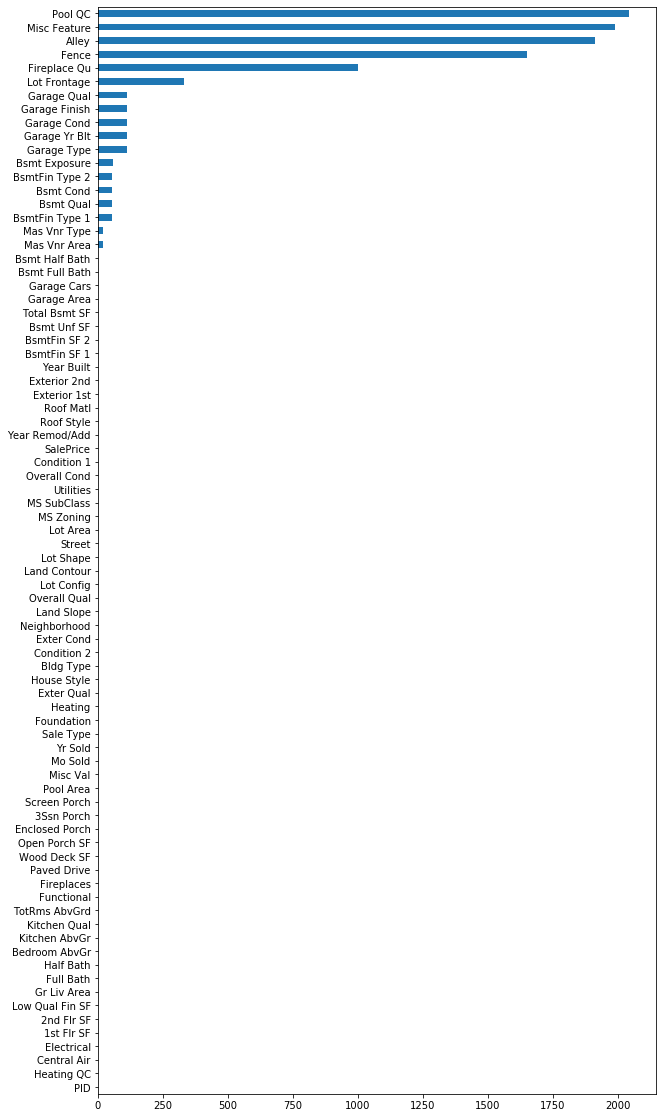

In [5]:
ames.isnull().sum().sort_values().plot(kind='barh',figsize=(10,20))

In [6]:
# finding object types in ames
objects_col=ames.columns[ames.dtypes=='object']
objects_col

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [7]:
num_col=ames.columns[ames.dtypes!='object']
num_col=list(num_col)

In [8]:
{i:ames[i].value_counts() for i in objects_col}

{'MS Zoning': RL         1598
 RM          316
 FV          101
 C (all)      19
 RH           14
 A (agr)       2
 I (all)       1
 Name: MS Zoning, dtype: int64,
 'Street': Pave    2044
 Grvl       7
 Name: Street, dtype: int64,
 'Alley': Grvl    85
 Pave    55
 Name: Alley, dtype: int64,
 'Lot Shape': Reg    1295
 IR1     692
 IR2      55
 IR3       9
 Name: Lot Shape, dtype: int64,
 'Land Contour': Lvl    1843
 HLS      85
 Bnk      80
 Low      43
 Name: Land Contour, dtype: int64,
 'Utilities': AllPub    2049
 NoSewr       1
 NoSeWa       1
 Name: Utilities, dtype: int64,
 'Lot Config': Inside     1503
 Corner      348
 CulDSac     131
 FR2          60
 FR3           9
 Name: Lot Config, dtype: int64,
 'Land Slope': Gtl    1953
 Mod      88
 Sev      10
 Name: Land Slope, dtype: int64,
 'Neighborhood': NAmes      310
 CollgCr    180
 OldTown    163
 Edwards    143
 Somerst    130
 NridgHt    122
 Gilbert    116
 Sawyer     111
 NWAmes      87
 SawyerW     87
 Mitchel     82
 BrkS

No objects formed due to typos such as like 207x and thus no type casting is needed

In [9]:
describe_chart=ames.describe().transpose()
describe_chart

count          mean           std          min          25%  \
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            474.5  8.110000e+02       2336.0  
Total Bsmt SF          994.5  1.318750e+03       6110.0  
1st Flr SF            1093.0  1.405000e+03    

Attempt to identify outliers using boxplot

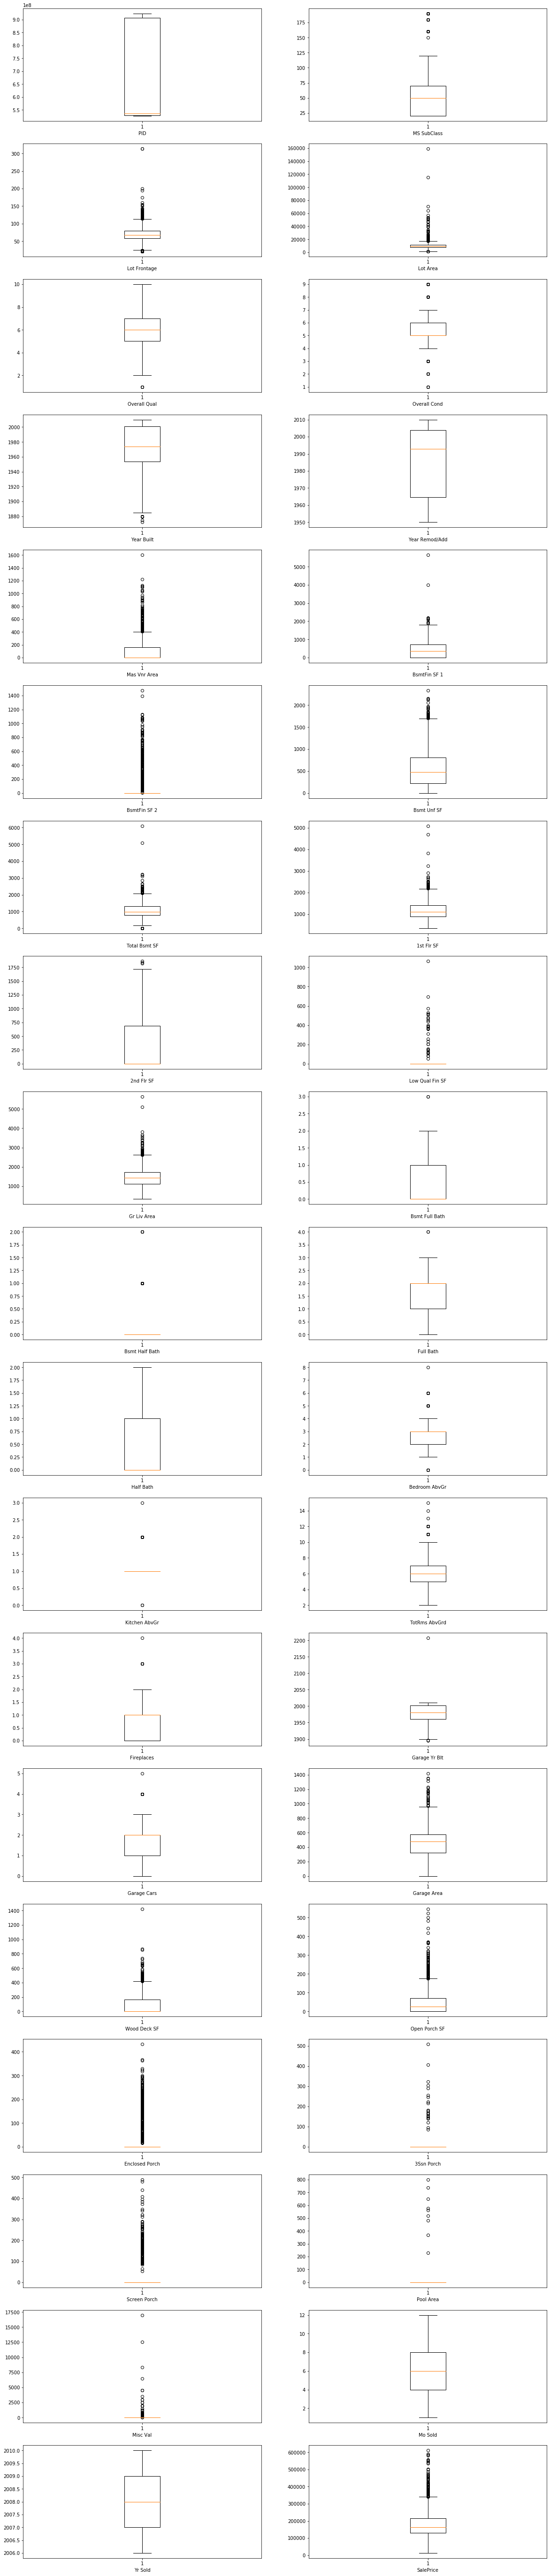

In [10]:
fig, ax = plt.subplots(19, ncols=2,figsize=(20,100))
ax = ax.ravel() 
for i, column in enumerate(num_col):
    # need to drop na because matplotlib in plot do not handle null well
    ax[i].boxplot(ames[column].dropna()) 
    ax[i].set_xlabel(column)

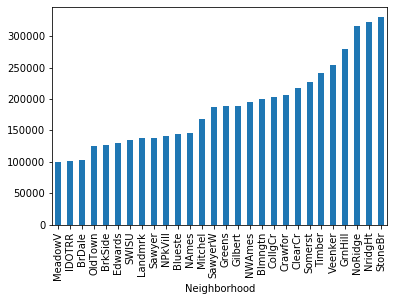

In [11]:
ames.groupby('Neighborhood').SalePrice.mean().sort_values().plot(kind='bar');

From the diagram, we observed many outliers (outside 3 std) for most of the categories. None of the values are also noticed to be below zero (no typo in sign). We also noticed many variable with means of 0 which we will need to think about for the inputation. 

Fortunately, we were given quite a lot of variables to work with and most of the key information such as Living Area SQ ft, yard size (Lot Area) and the type of neighborhood which we can foresee to be the key indicators are already provided. However, the amount of missing data seems to be quite sizable that made certain columns seem redundant.

We will remove a few outlier seen in the salesprice(>400000) which coincidentally corresponds to the partial sales (does not reflect market price) and large housings (same outliers with above grade sq_ft).

# Data Cleaning

In [12]:
# dropping SalePrice outliers
ames=ames[ames.SalePrice<400000]

In [13]:
# We intend to drop all the columns with 5% or higher of values missing ie. we work on col that is 95% intact
dropping=ames.columns[ames.isnull().sum()/len(ames)>=0.5]
dropping

Index(['Alley', 'Pool QC', 'Fence', 'Misc Feature'], dtype='object')

In [14]:
# check for column dropped
ames.drop(dropping,axis=1,inplace=True)
len(ames.columns)

76

In [15]:
print(ames['SalePrice'].isnull().sum()/len(ames))

0.0


In [16]:
# checking the rows where there are nulls
ames.isnull().any(axis=1).mean()

0.6164588528678304

We were going to drop the rows that have any null but looks impossible now since that would be 60% of the data. So inputation is required and the imputation method will depend on the type of data. For number types, we will fill the NA with a mean value from distribution made from the other values of the column assumed to be normal. For the object type, we plan to do the same but with mode instead of mean since they are categorical.

In [17]:
# checking the type of is null
missing_col=ames.columns[(ames.isnull().sum()!=0)]
ames[missing_col].dtypes

Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
dtype: object

In [18]:
# trying to find index of null
ames.index[ames['Mas Vnr Area'].isnull()]

Int64Index([2393,  539,  518, 2824, 1800, 1455, 1120, 1841, 1840, 2230, 1123,
            1784,  485, 1752, 1185, 1128, 1096, 2261, 2456, 1728,   56],
           dtype='int64', name='Id')

However, certain variables can be further tuned to be nominal. Except Electrical since that category is mixed with nominal and categorical variable. I also changed MS SubClass to ordinal and PID to Bool.

In [19]:
# change all the variable from the description that is norminal
nom_list=['Lot Shape','Land Contour','Bsmt Qual','Bsmt Cond','Bsmt Exposure','Exter Qual','Exter Cond','BsmtFin Type 2',
          'Heating QC','Kitchen Qual','Functional','Garage Finish','BsmtFin Type 1',
          'Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Sale Type','MS SubClass','PID>850,000,000',
          'Utilities']
def change_nominal_ordinal(ames):
    ames.loc[:,'Land Slope']=ames['Land Slope'].map({'Gtl':3.,'Mod':2,'Sev':1})
    ames.loc[:,'Land Contour']=ames['Land Contour'].map({'Lvl':0.,'Bnk':1,'HLS':2,'Low':-1})
    ames.loc[:,'Bsmt Qual']=ames['Bsmt Qual'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
    ames.loc[:,'Bsmt Cond']=ames['Bsmt Cond'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
    ames.loc[:,'Bsmt Exposure']=ames['Bsmt Exposure'].map({'Gd':4.,'Av':3,'Mn':2,'No':1,'NA':0})
    ames.loc[:,'Lot Shape']=ames['Lot Shape'].map({'IR1':3.,'Reg': 4,'IR2':2,'IR3':1})
    ames.loc[:,'Exter Qual']=ames['Exter Qual'].map({'Ex':5.,'Gd':4,'TA':3.,'Fa':2,'Po':1})
    ames.loc[:,'Exter Cond']=ames['Exter Cond'].map({'Ex':5.,'Gd':4.,'TA':3.,'Fa':2.,'Po':1})
    ames.loc[:,'BsmtFin Type 2']=ames['BsmtFin Type 2'].map({'GLQ':6.,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
    ames.loc[:,'Heating QC']=ames['Heating QC'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1})
    ames.loc[:,'Kitchen Qual']=ames['Kitchen Qual'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1})
    ames.loc[:,'Functional']=ames['Functional'].map({'Typ':8.,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
    ames.loc[:,'Fireplace Qu']=ames['Fireplace Qu'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1})
    ames.loc[:,'Garage Finish']=ames['Garage Finish'].map({'Fin':3.,'RFn':2,'Unf':1,'NA':0})
    ames.loc[:,'BsmtFin Type 1']=ames['BsmtFin Type 1'].map({'GLQ':6.,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
    ames.loc[:,'Garage Qual']=ames['Garage Qual'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1})
    ames.loc[:,'Garage Cond']=ames['Garage Cond'].map({'Ex':5.,'Gd':4,'TA':3,'Fa':2,'Po':1})
    ames.loc[:,'Paved Drive']=ames['Paved Drive'].map({'Y':2.,'P':1,'N':0})
    ames.loc[:,'Utilities']=ames['Utilities'].map({'AllPub':3.,'NoSewr':2,'NoSeWa':1,'ELO':0})
    ames.loc[:,'Sale Type']=ames['Sale Type'].map({'CWD':9.,'VWM':8,'New':7,'COD':6,'Con':5,'ConLw':4,'ConLI':3,'ConLD':2,'Oth':1})
    # MS SubClass is ordinal 
    ames.loc[:,'MS SubClass']=ames['MS SubClass'].map(lambda x: str(x))
    # assigning 1 to PID>850,000,000 and 0 to the rest so that PID is nominal
    ames['PID>850,000,000']=ames['PID'].map(lambda x:True if x>850000000 else False)
    ames.drop('PID',axis=1,inplace=True)
    
change_nominal_ordinal(ames)
#check
ames[nom_list].dtypes

Lot Shape          float64
Land Contour       float64
Bsmt Qual          float64
Bsmt Cond          float64
Bsmt Exposure      float64
Exter Qual         float64
Exter Cond         float64
BsmtFin Type 2     float64
Heating QC         float64
Kitchen Qual       float64
Functional         float64
Garage Finish      float64
BsmtFin Type 1     float64
Fireplace Qu       float64
Garage Finish      float64
Garage Qual        float64
Garage Cond        float64
Paved Drive        float64
Sale Type          float64
MS SubClass         object
PID>850,000,000       bool
Utilities          float64
dtype: object

### Imputer Functions

In [20]:
# function to do numeric replacement method demonstrated in Proof of concept
def fill_missing_num(col,df=ames):
    for i in list(df.index[df[col].isnull()]):
        #modelling normal distribution and taking a value from the existing data
        distribution=np.random.normal(loc=df[col].mean(),scale=df[col].std(),size=10).mean()
        # since none of the values are negative, we set it such that all the values become 0 if negative
        if distribution<0:
            distribution=0 
        df.loc[i,col]=distribution

In [21]:
# now trying to make a function to replace the objects demonstrated in Proof of concept
def fill_missing_obj(col,df=ames):
    for i in list(df.index[df[col].isnull()]):
        # this step calculates the probability of the category using the value_counts
        cat_list=df[col].value_counts()/df[col].value_counts().sum()
        # extracting the mode value from the random choice using probabilities calculated by the above step
        mode,count=stats.mode(np.random.choice(list(cat_list.index),p=cat_list.values,size=10))
        # putting mode into place
        ames.loc[i,col]=mode

In [22]:
# fill up using both functions
def fill_everything(df=ames):
    num_col=list(df.columns[df.dtypes!='object'])
    objects_col=list(df.columns[df.dtypes=='object'])
    for i in num_col:
       fill_missing_num(i,df)
    for i in objects_col:
       fill_missing_obj(i,df)

In [23]:
# calling the function to work
fill_everything()

In [24]:
# to show fill_everything work
ames.isnull().sum().sum()

0

Now that we are done dealing with missing values and combined some of the parameters such as the sf and rooms. We can look into finding variables that has no relationship to saleprice and drop these features.

Looking at the details in the row below. This is an extremely large house at excellent condition sold at ridiculously low pricing. We will remove this outlier as well. This is only noticed further down the analysis and we decided to bring it up here to be removed.

In [25]:
ames[ames.SalePrice==183850]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                     
2181          20        RL         128.0     39290   Pave        3.0   

      Land Contour  Utilities Lot Config  Land Slope  ... Enclosed Porch  \
Id                                                    ...                  
2181           1.0        3.0     Inside         3.0  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
Id                                                                             
2181          0            0         0    17000       10     2007        7.0   

      SalePrice PID>850,000,000  
Id                               
2181     183850            True  

[1 rows x 76 columns]

In [26]:
ames.drop([2181],inplace=True)

## Exploratory Visualizations

Grouping some of the similar features together...

In [27]:
ames['total_sf'] = ames['1st Flr SF']+ames['2nd Flr SF']+ames['Wood Deck SF']+ames['Open Porch SF']+ames['Garage Area']

In [28]:
ames['total_room_plus_baths'] = ames['Full Bath']+ames['Bedroom AbvGr']+ames['Kitchen AbvGr']+ames['TotRms AbvGrd']+ames['Bsmt Full Bath']

Finding high correlations variables to drop (Independence of variables) without using heatmap since there are too many parameters

In [29]:
# # not making heatmap since too many variables to go through
corr=abs(ames.corr())>0.75
for i,j in corr.iteritems():
    for k,l in j.items():
        # i dont want the coefficients for itself so i!=k
        if l==True and i!=k:
            print(i,k,l)


Overall Qual SalePrice True
Year Built Garage Yr Blt True
BsmtFin Type 2 BsmtFin SF 2 True
BsmtFin SF 2 BsmtFin Type 2 True
Total Bsmt SF 1st Flr SF True
1st Flr SF Total Bsmt SF True
Gr Liv Area TotRms AbvGrd True
Gr Liv Area total_sf True
Gr Liv Area total_room_plus_baths True
Bedroom AbvGr total_room_plus_baths True
TotRms AbvGrd Gr Liv Area True
TotRms AbvGrd total_room_plus_baths True
Garage Yr Blt Year Built True
Garage Cars Garage Area True
Garage Area Garage Cars True
SalePrice Overall Qual True
SalePrice total_sf True
total_sf Gr Liv Area True
total_sf SalePrice True
total_room_plus_baths Gr Liv Area True
total_room_plus_baths Bedroom AbvGr True
total_room_plus_baths TotRms AbvGrd True


In [30]:
# we drop features with high correlation
Unwanted_features=['Garage Yr Blt','BsmtFin Type 2','Total Bsmt SF','Gr Liv Area','Bedroom AbvGr','TotRms AbvGrd','Garage Cars']
ames.drop(Unwanted_features,axis=1,inplace=True)

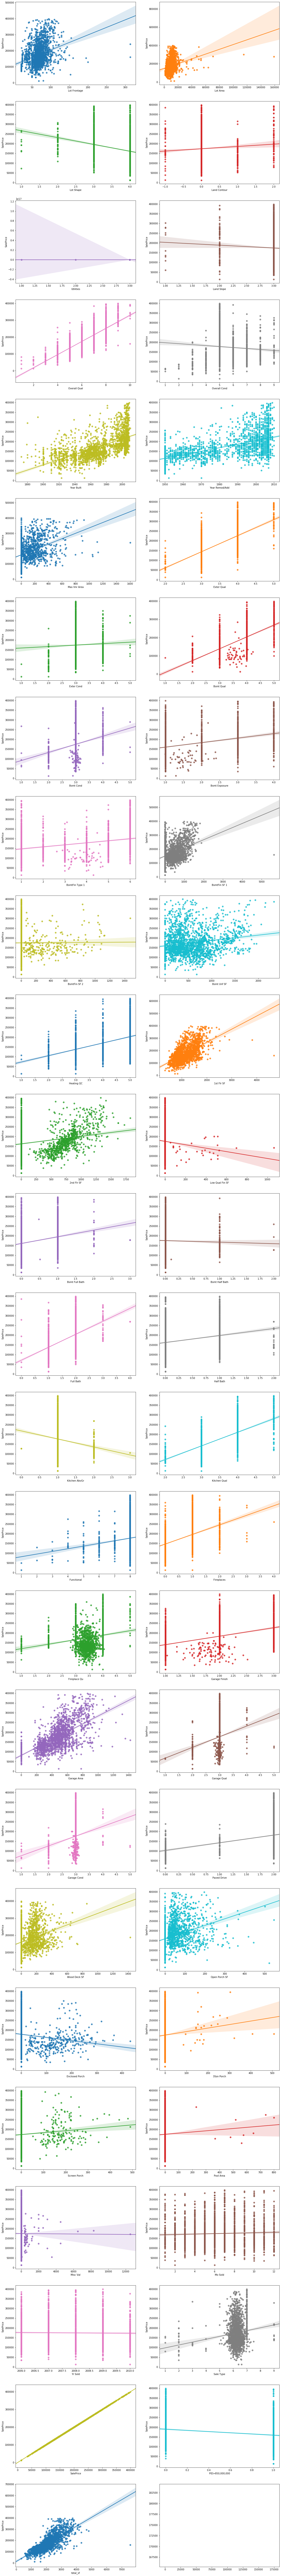

In [31]:
# plotting the numeric types of data
num_col=ames.columns[ames.dtypes!='object']
fig, ax = plt.subplots(int(len(num_col)/2), ncols=2,figsize=(20,200))
# making ax easier to use
ax = ax.ravel()
# -1 is used to drop SalesPrice since that is guaranteed to be linear
for i,j in enumerate(num_col[:-1]):
    sns.regplot(x=j,y='SalePrice',data=ames,ax=ax[i])

Removing variables that are not linear(Linearity).

In [32]:
Unwanted_features=['Lot Frontage','Lot Area','Utilities','Land Slope','Mas Vnr Area','BsmtFin SF 2','Bsmt Unf SF',
                   'Bsmt Half Bath','Wood Deck SF','Enclosed Porch']
ames.drop(Unwanted_features,axis=1,inplace=True)

Now, we do the same for the object list using swarmplots.

In [33]:
obj_col=ames.columns[ames.dtypes=='object']
ames[obj_col].head()

MS SubClass MS Zoning Street Lot Config Neighborhood Condition 1  \
Id                                                                     
109          60        RL   Pave    CulDSac       Sawyer        RRAe   
544          60        RL   Pave    CulDSac      SawyerW        Norm   
153          20        RL   Pave     Inside        NAmes        Norm   
318          60        RL   Pave     Inside       Timber        Norm   
255          50        RL   Pave     Inside      SawyerW        Norm   

    Condition 2 Bldg Type House Style Roof Style Roof Matl Exterior 1st  \
Id                                                                        
109        Norm      1Fam      2Story      Gable   CompShg      HdBoard   
544        Norm      1Fam      2Story      Gable   CompShg      VinylSd   
153        Norm      1Fam      1Story      Gable   CompShg      VinylSd   
318        Norm      1Fam      2Story      Gable   CompShg      VinylSd   
255        Norm      1Fam      1.5Fin      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type Foundation Heating Central Air Electrical  \
Id                                                                        
109      Plywood      BrkFace     CBlock    GasA           Y      SBrkr   
544      VinylSd      BrkFace      PConc    GasA           Y      SBrkr   
153      VinylSd         None     CBlock    GasA           Y      SBrkr   
318      VinylSd         None      PConc    GasA           Y      SBrkr   
255      Plywood         None      PConc    GasA           Y      SBrkr   

    Garage Type  
Id               
109      Attchd  
544      Attchd  
153      Detchd  
318     BuiltIn  
255      Detchd

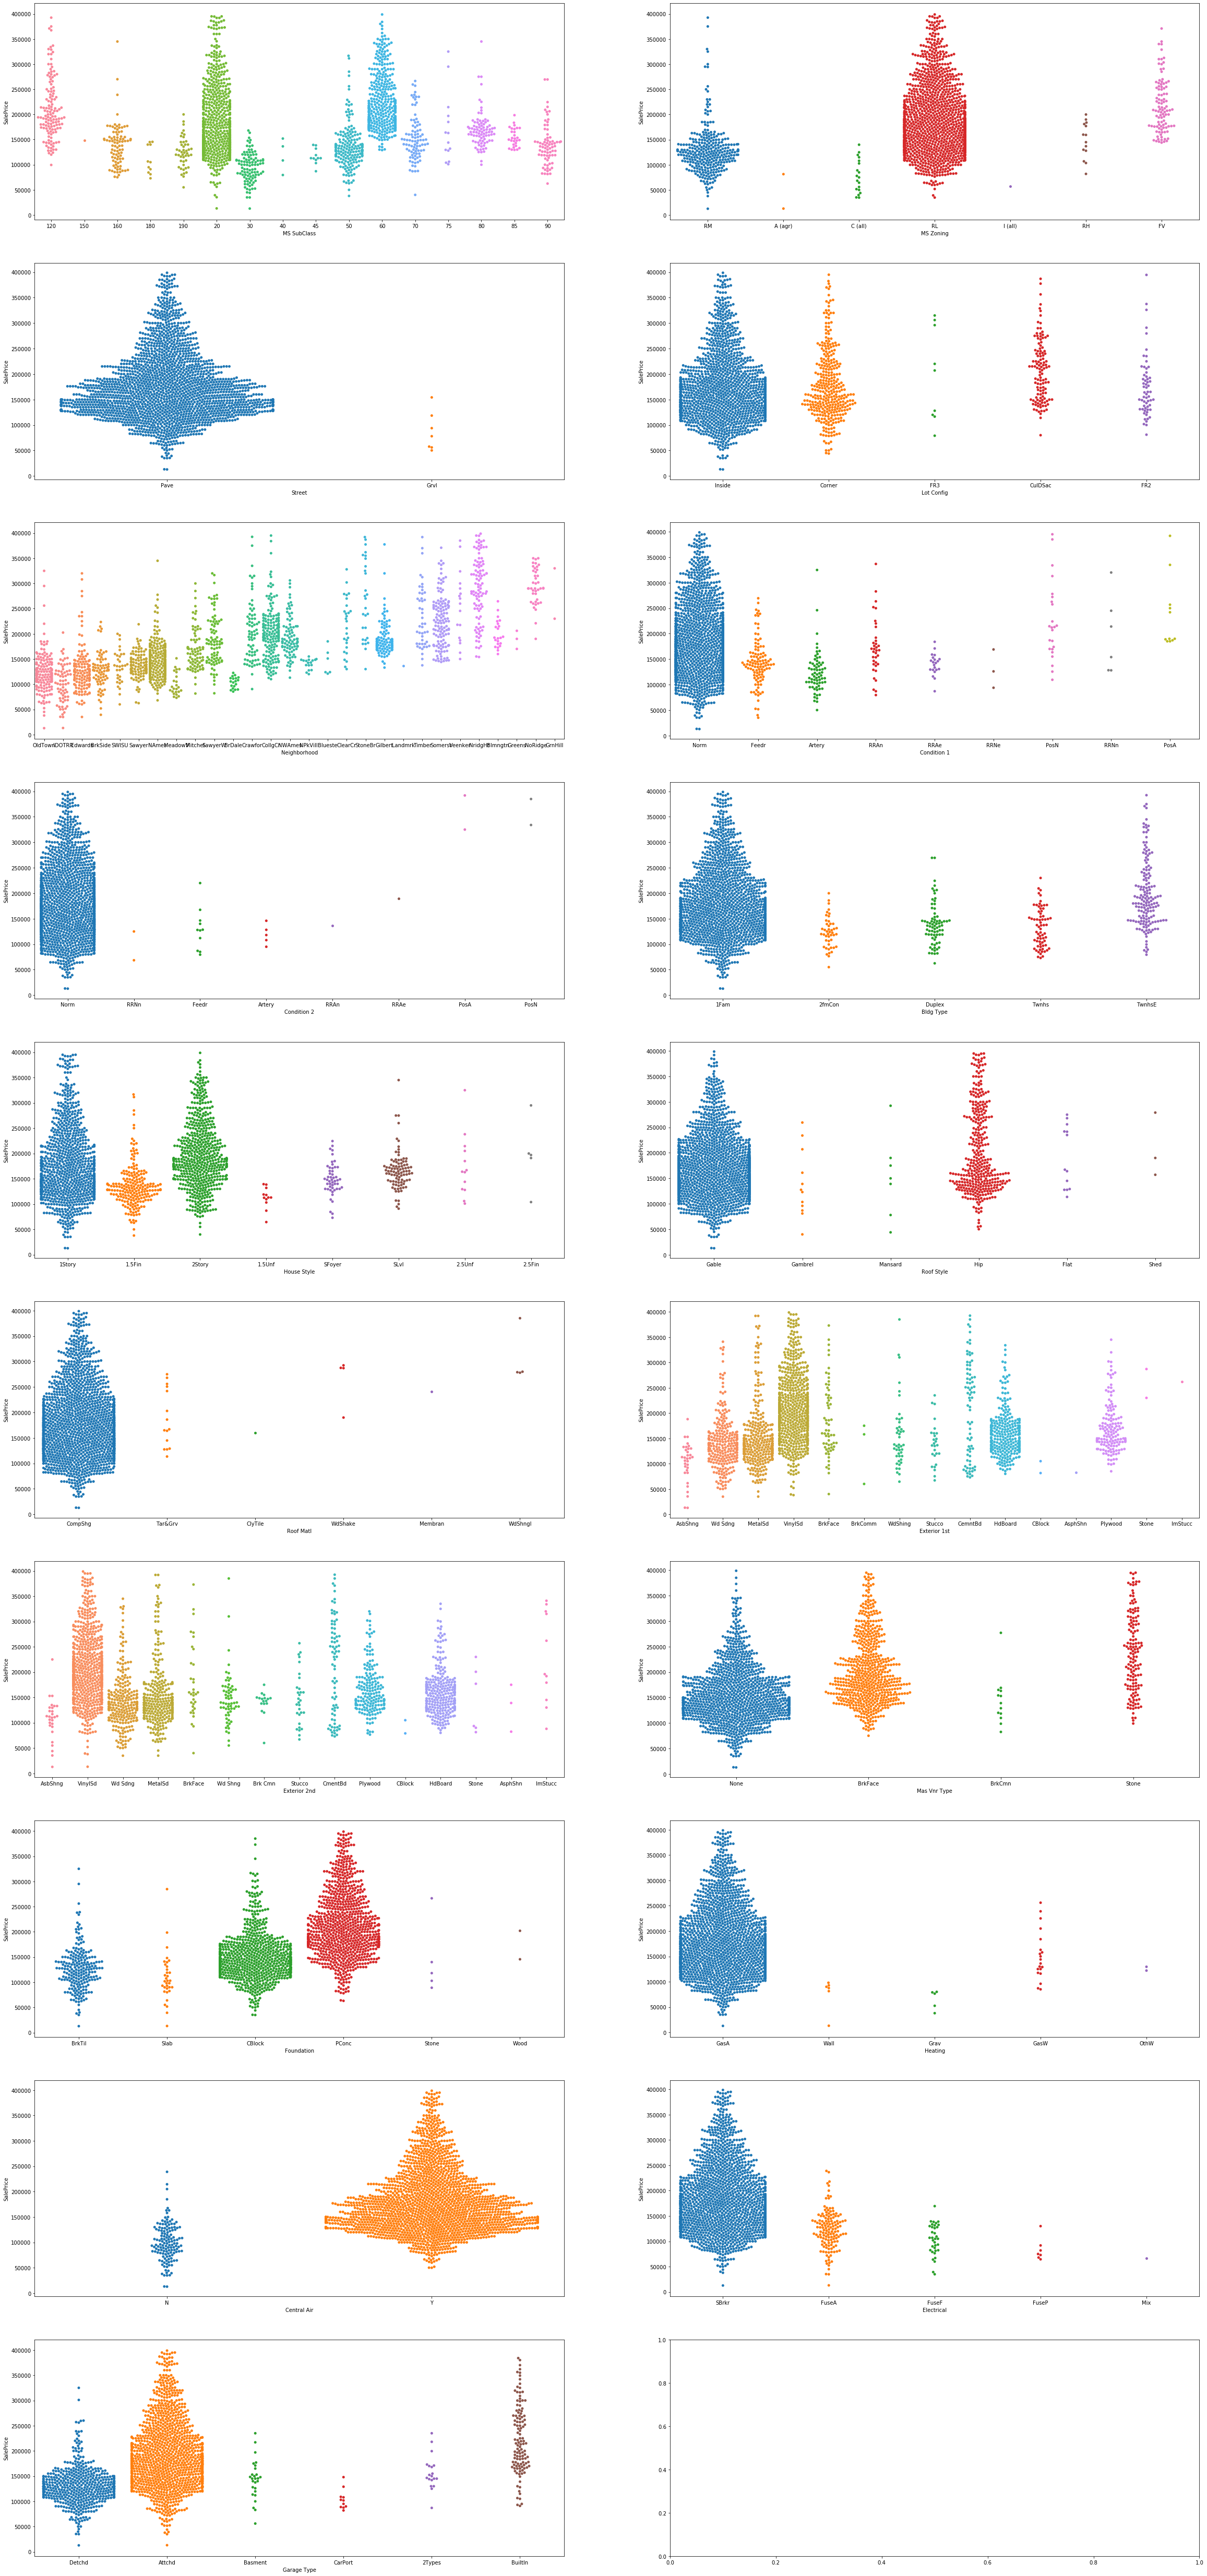

In [34]:
# plotting the object type in the Ames Dataset
obj_col=ames.columns[ames.dtypes=='object']
# creating the axes according to len of the col and giving a width of 10 
half_obj_len=int(len(obj_col)/2)
fig, ax = plt.subplots(half_obj_len+1, ncols=2,figsize=(40,half_obj_len*10))
ax = ax.ravel()
for i,j in enumerate(obj_col):
    sns.swarmplot(x=j,y='SalePrice',data=ames.sort_values('SalePrice'),ax=ax[i])

We attempt to find any graphs that distribution seems not to be linear to SalesPrice across the category. As expected, there is indeed a great disparity across neighbourhood as one might expect.

In [35]:
# I looked at whether the distribution is 'leveled' or going upwards
Unwanted_features=['Street','Lot Config','Roof Style','Exterior 2nd','Bldg Type','House Style','Foundation',
                   'MS Zoning','Roof Style']
ames.drop(Unwanted_features,axis=1,inplace=True)

In [36]:
# Land Contour kind of similar to slope
Unwanted_features=['Land Contour']
ames.drop(Unwanted_features,axis=1,inplace=True)

In [37]:
ames.to_csv('datasets/ames_edited')

## Pre-processing

In [38]:
# creating dummy variables for all the object type data
obj_col=ames.columns[ames.dtypes=='object']
ames_dummied=pd.get_dummies(data=ames,columns=obj_col,drop_first=True)
X=ames_dummied.drop('SalePrice',axis=1)
y=ames_dummied['SalePrice']
print(len(ames_dummied.columns))

134


In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,y)

In [40]:
#transformer initialised and tested
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

## Modeling

Attempt to get a feel of the result using the LR

In [41]:
# LR instantiation plus training 
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)
print("R^2 Score: {}".format(metrics.r2_score(y_test,predictions)))

R^2 Score: -2.1422200894555372e+22


The model is not working at all. There are too much weights affect the predictions, We will try to drop these using Feature Selection: Recursive Feature Elimination. This method runs the estimators and drop the smallest coefficient till we get the smallest subset for the final model. These coefficients will be our final estimator

In [42]:
# this is done using X since i tried X_train and it doesnt extend well at all
lassocv=LassoCV(cv=12,n_alphas=200)
lassocv.fit(X,y)
lasso_alpha=lassocv.alpha_
lasso=Lasso(alpha=lasso_alpha)
lasso.fit(X,y)
# finding optimal features involved from entire set
rfecv=RFECV(lasso,cv=12)
rfecv.fit(X,y)
# i had 8 features in a previous run which i am going to use
rfecv.n_features_

7

In [70]:
# this is set to 8 because thats what i used in the previous run (should be rfecv.n_features instead)
rfe=RFE(lasso,n_features_to_select=7)
rfe.fit(X_train_scaled,y_train)
X_rfe_col = X.loc[:, rfe.get_support()]
# i want to fit these parameters which i got from a previous run but otherwise i should be using X_rfe.columns
X_rfe_col=['Overall Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'total_sf',
       'Roof Matl_Membran', 'Roof Matl_WdShngl']

In [71]:
#Redo scaling with the new X_col
X=X[X_rfe_col]
X_train,X_test,y_train,y_test= train_test_split(X,y)
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

In [72]:
# checking the lasso model for scores
lassocv=LassoCV(cv=12,n_alphas=200)
lassocv.fit(X_train_scaled,y_train)
lasso_alpha=lassocv.alpha_
lasso=Lasso(alpha=lasso_alpha)
lasso.fit(X_train_scaled,y_train)
lasso_cv_score=cross_val_score(lasso,X_test_scaled,y_test,cv=12)
lasso_cv_score

array([0.8800152 , 0.74761766, 0.76305625, 0.75291193, 0.744363  ,
       0.83130707, 0.79723896, 0.7724322 , 0.84766007, 0.81642387,
       0.75044655, 0.73605209])

In [73]:
# checking the ridge model for scores
ridgecv=RidgeCV(cv=12,alphas=np.logspace(0, 5, 200))
ridgecv.fit(X_train_scaled,y_train)
ridge_alpha=ridgecv.alpha_
ridge=Ridge(alpha=ridge_alpha)
ridge.fit(X_train_scaled,y_train)
ridge_cv_score=cross_val_score(ridge,X_test_scaled,y_test,cv=12)
ridge_cv_score

array([0.86584859, 0.73996437, 0.79388768, 0.74362522, 0.73731986,
       0.82701648, 0.78843098, 0.77932728, 0.83100581, 0.82013839,
       0.7649545 , 0.74581787])

In [74]:
# checking the Linear Regression model for scores
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr_cv_score=cross_val_score(lr,X_test_scaled, y_test,cv=12)
lr_cv_score

array([0.87999067, 0.7479517 , 0.76241365, 0.75282858, 0.74436968,
       0.83162616, 0.79738251, 0.7721457 , 0.84788433, 0.81647719,
       0.75035118, 0.73615762])

In [75]:
print(lasso_cv_score.std(),ridge_cv_score.std(),lr_cv_score.std())

0.04519565366542116 0.040519081195227694 0.04526197490613946


We chose ridge to be the model used in predicting the saleprice since the difference in the mean is smallest and since our aim is to get predictions for the salesprice, we need something that generalise well although all 3 regression seems to work roughly the same. Also, on most cases, the r_2 are pretty high about 0.7 and 0.8 anyways.

 ## Inferential Visualization

Since we have chosen our model, we can recombined the test and train for ames to get as close as possible coefficients

In [76]:
# redo the ridge on all dataset
ss=StandardScaler()
ss.fit(X)
# input only the features selected
X=X[X_rfe_col]
X_train=ss.transform(X)
ridgecv=RidgeCV(cv=8,alphas=np.logspace(0, 5, 200))
ridgecv.fit(X,y)
ridge_alpha=ridgecv.alpha_
ridge=Ridge(alpha=ridge_alpha)
ridge.fit(X,y)

Ridge(alpha=3.78346261713193, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

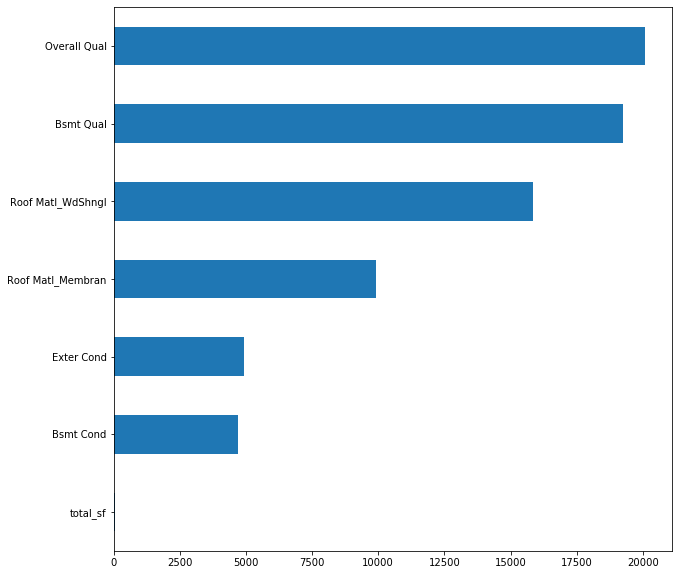

In [77]:
ridge_coefs = pd.DataFrame([ridge.coef_,abs(ridge.coef_)],columns=X.columns,index=['coef','coef_abs'])
#plot the coefficents
ridge_coefs=ridge_coefs.transpose()
ridge_coefs['coef'].sort_values().plot(kind='barh',figsize=(10,10));

We have narrowed the variables and found that Prices to scale well with Overall Quality and Basement Quality and sizes do not affect the conditions as much. Arguably, further finetune could be used since  Basement Condition and Quality are actually collinear which I wasn't able to pick up on using the correlation coefficient. Lowering the theshold to 60% from 75% might help further improve this model.

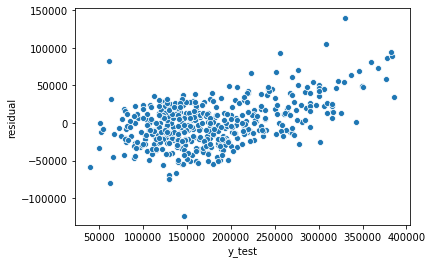

In [78]:
y_pred=ridge.predict(X_test)
residual = y_test-y_pred
res={'y_test':y_test,'residual':residual}
res=pd.DataFrame(data=res)
sns.scatterplot(x='y_test',y='residual',data=res);

Most of the residuals are well-distributed and i would say homoscedasticity  has been more of less achieved.

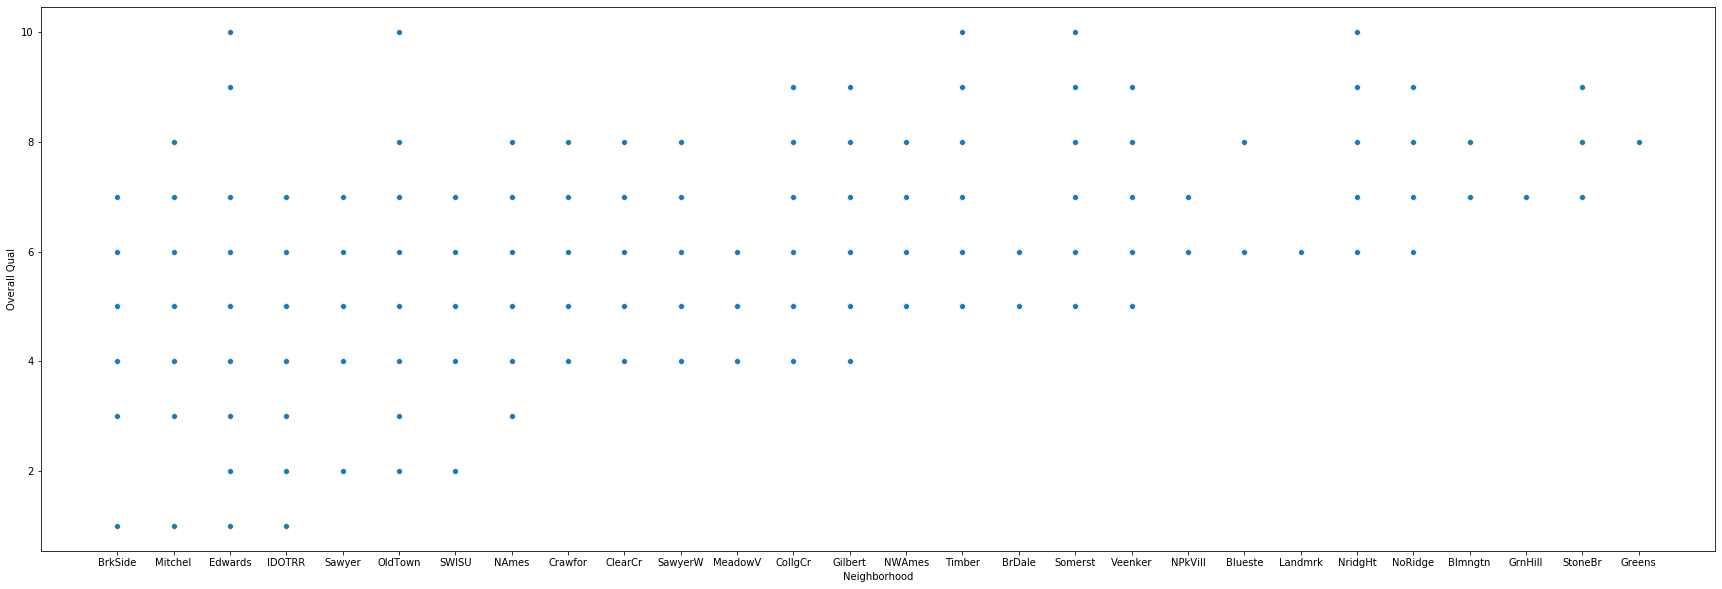

In [57]:
plt.figure(figsize=(30,10))
sns.scatterplot('Neighborhood','Overall Qual',data=ames.sort_values('Overall Qual'));

We were curious why neighbourhood which we originally expected to be a potential factor did not appear as a coefficient. It seems like the coefficient might have been dropped due to the linearity it has with the Overall Quality. It seems like there are some other underlying factors that might pushes both the neighbourhood and the quality of the house since we cannot imagine ways where neighbourhood is related to Overall Quality.

 ### Kaggle Submission

In [ ]:
test=pd.read_csv('datasets/test.csv',index_col='Id')
change_nominal_ordinal(test)
fill_everything(test)
test['total_sf'] = test['1st Flr SF']+test['2nd Flr SF']+test['Wood Deck SF']+test['Open Porch SF']+test['Garage Area']
test['total_room_plus_baths'] = test['Full Bath']+test['Bedroom AbvGr']+test['Kitchen AbvGr']+test['TotRms AbvGrd']+test['Bsmt Full Bath']
obj_col=test.columns[test.dtypes=='object']
test_dummied=pd.get_dummies(data=test,columns=obj_col)

In [ ]:
# generate the columns test_dummied might not have ie. test set might not have created the same amount of dummies as 
# in train set for example
# A,B,C in train -> dummies A,B,C A,B in test -> dummies A,B, test set has smaller width
X_rfe_series=pd.Series(X_rfe_col)
missing_col=X_rfe_series[np.logical_not(np.isin(X_rfe_col,test_dummied.columns))].values
missing_col

In [ ]:
for i in missing_col:
    test_dummied[i]=0
#check for column addition
test_dummied[missing_col].head()

In [ ]:
test_dummied=test_dummied[X_rfe_col]
print(test_dummied.columns,X_rfe_col)

In [ ]:
test_dummied=ss.transform(test_dummied)
export =pd.DataFrame(ridge.predict(test_dummied),index=test.index,columns=['SalePrice'])
export.head()
export.to_csv('datasets/Kaggle.csv')

![](images/kaggle_score.png)

## Conclusions and Recommendations

From the above exercise, we have managed to find the key predictors of housing price to be total square feet of the housing as well as the years were it was remodelled or built. These are within expectation. However, we do not observe any feature that would negatively affect the sales price. The scoring for the model has also achieved a high enough score of average 0.7 to 0.8 and we can say that this is reasonably effective to predict the pricing of the houses. However, for the outliers sale prices above 300,000 this model would not work as well as seen in the residual plot which is fine since sale price in that range is far and few. Interestingly, the idea of 'good  or safe neighbourhood' does not seem to affect the housing price as one might presume. 

Stakeholders are recommended to build high quality housing based on the model keeping in mind to balance the increase in cost that comes with better quality. Also, there seems to be little need to be as concerned about negative factors since none have effectively appeared.

One note of caution though, this model is set to predict the sale price of the housing. Unless very strongly weighted, it should not be used as a direct indicators. For example, roof materials may appear to be a important feature but it does not mean roof material results in higher prices. Correlation do not necessarily means causation.

Further research that could futher improve the model could include the availability of Cosco or Walmart or eateries or schools in the Proximity to various conditions column of the dataset to show if promxity is truly a null factor. If possible I would also like to have data on crimes reported in the region so as to see if there is an opportunity to improve the saleprices via investing a little in security. Availability of buyer data and coordinates of home sales would be beneficial for studies to determine the market audience so that property developers can better target buyers.